In [32]:
from bs4 import BeautifulSoup
import html5lib
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#scraping the data from a website 
#Write your code here
url = "https://web.archive.org/web/20200318083015/https://en.wikipedia.org/wiki/List_of_largest_banks"
html_data = requests.get(url).text

In [6]:
html_data[760:783]

'web.archive.org/","web"'

In [8]:
#parsing the html data using beautiful soup 
soup = BeautifulSoup(html_data, "html.parser") 

In [14]:
data = pd.DataFrame(columns=["Bank Name", "Market Cap US$ Billion"])

# Find the table by class name
table = soup.find_all("table")[2]  # selecting a table based on the index on the page 
# Extract data from the table rows
for row in table.find_all("tr"):
    cols = row.find_all("td")
    # Check if there are at least two columns in the ro
    if len(cols) >= 2: 
        name = cols[1].text.strip() # using the strip function to remove the spaces 
        market_cap = cols[2].text.strip()
        data = data._append({"Bank Name": name, "Market Cap US$ Billion": market_cap}, ignore_index=True)

In [82]:
data

,Bank Name,Market Cap US$ Billion
20,HDFC Bank,100
16,Goldman Sachs,100.705
15,BNP Paribas,103.258
14,Toronto-Dominion Bank,108.449
13,Mitsubishi UFJ Financial Group,111.660
...,...,...
22,Westpac,84.560
21,Itaú Unibanco,86.203
19,U.S. Bancorp,94.558
18,Morgan Stanley,99.651


In [30]:
bank_assets = pd.DataFrame( columns=["Bank Name", "Total Assets US$ Billion"])
asset_table = soup.find_all("table")[0]

for row in asset_table.find_all("tr"):
    table_column = row.find_all("td")
    if len(table_column)>=2: 
        bank_name = table_column[1].text.strip() 
        total_assets = table_column[2].text.strip()
        bank_assets = bank_assets._append({"Bank Name":bank_name, "Total Assets US$ Billion":total_assets}, ignore_index=True)

In [31]:
bank_assets

,Bank Name,Total Assets US$ Billion
0,Industrial and Commercial Bank of China,"4,027.44"
1,China Construction Bank,"3,376.52"
2,Agricultural Bank of China,"3,287.36"
3,Bank of China,"3,092.21"
4,Mitsubishi UFJ Financial Group,"3,069.20"
...,...,...
96,Swedbank,254.74
97,BayernLB,252.15
98,State Street Corporation,244.60
99,China Zheshang Bank,239.43


In [40]:
top_bank_assets = bank_assets.iloc[0:10,:]

In [41]:
top_bank_assets 

,Bank Name,Total Assets US$ Billion
0,Industrial and Commercial Bank of China,"4,027.44"
1,China Construction Bank,"3,376.52"
2,Agricultural Bank of China,"3,287.36"
3,Bank of China,"3,092.21"
4,Mitsubishi UFJ Financial Group,"3,069.20"
5,HSBC Holdings PLC,"2,715.15"
6,JPMorgan Chase,"2,687.38"
7,Bank of America,"2,354.51"
8,BNP Paribas,"2,336.66"
9,Crédit Agricole,"2,123.61"


In [57]:
top_bank_assets = top_bank_assets.sort_values(by="Total Assets US$ Billion", ascending=True)

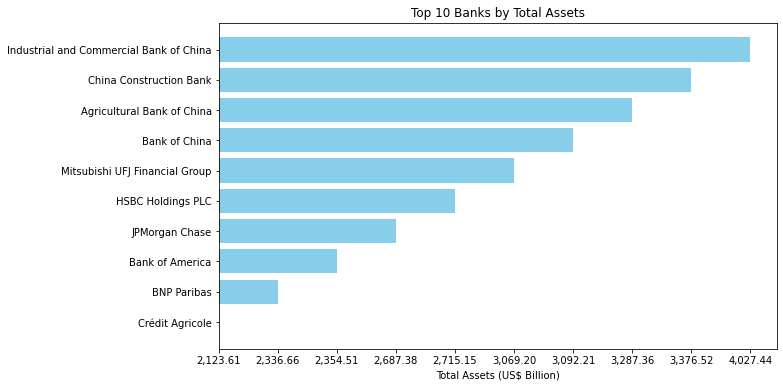

In [64]:
# Create horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_bank_assets["Bank Name"], top_bank_assets["Total Assets US$ Billion"], color='skyblue')
plt.xlabel('Total Assets (US$ Billion)')
plt.title('Top 10 Banks by Total Assets')
#plt.gca().invert_yaxis()  # Invert y-axis to display the highest asset bank on top
#plt.gca().invert_xaxis()  # Invert x-axis to start from the lowest value
plt.show()